# L8- Regression Simulation 

## Author - 



## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.tsaplots as splt
import statsmodels.tsa.seasonal as sts
from pmdarima import auto_arima

In [20]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"

In [21]:
df = pd.read_csv(fileName)

Choose icecream production for the rest analysis

In [4]:
df.head().round(2)

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
0,1995,Jan,4.37,51.60,2.11,0.98,1,1,1
1,1995,Feb,3.70,56.09,1.93,0.89,2,4,8
2,1995,Mar,4.54,68.45,2.16,0.89,3,9,27
3,1995,Apr,4.28,65.72,2.13,0.90,4,16,64
4,1995,May,4.47,73.73,2.23,0.90,5,25,125


In [5]:
df.tail().round(2)

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
223,2013,Aug,2.17,78.38,3.40,1.63,224,50176,11239424
224,2013,Sep,2.19,74.87,3.20,1.55,225,50625,11390625
225,2013,Oct,2.28,70.01,3.34,1.56,226,51076,11543176
226,2013,Nov,1.86,61.39,3.28,1.75,227,51529,11697083
227,2013,Dec,2.35,53.65,3.47,1.67,228,51984,11852352


From the first five and last five rows of the dataset, we noticed that the dataset start from 1995 January to 2013 December. And all features are numerical data.

In [6]:
#rename the index 
df.index = pd.date_range(start = '1-1995', end = '1-2014', freq = 'M')

#### 1. Is this time series stationary?

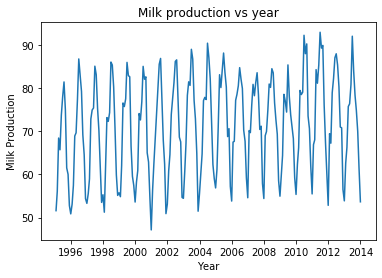

In [7]:
# plot milk production vs time
plt.plot(df['Icecream.Prod'])
plt.xlabel('Year')
plt.ylabel('Milk Production')
plt.title( 'Milk production vs year');

We say that a time series with a constant variance is stationary. The properties of a stationary time series do not vary with time..

But in this trend, it has a significant trend of seasons. Let's plot ACF and PACF to see whether it's stationary.

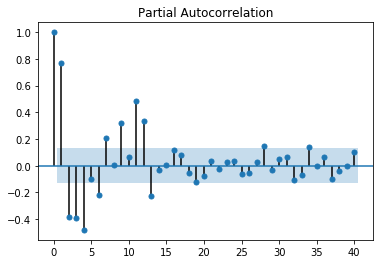

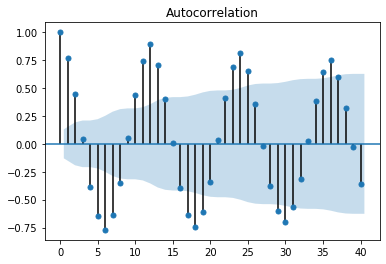

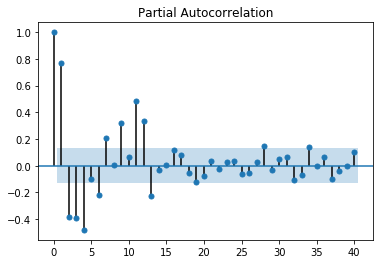

In [8]:
splt.plot_acf(df['Icecream.Prod'], lags = 40)
splt.plot_pacf(df['Icecream.Prod'], lags = 40,method='ywm')

From ACF and PACF graphs, there are a few significant values for several lags. These are the results of the trend creating dependency from one value to the next. Thus this time series is not stationary, agree with the previous analysis. 

#### 2.Is there a significant seasonal component to this time series?

Yes, we can see from autocorrelation that it has negative significant values in June and positive significant value in December, and then the pattern repeats.

#### 3.Perform STL decomposition of the time series. Should this decomposition be performed with the additive or multiplicative (log of values) model? Are the residuals stationary?

This should be additive since the seasonal variation is relatively constant over time.

               resid      trend   seasonal
1995-01-31       NaN        NaN -10.272597
1995-02-28       NaN        NaN  -6.441930
1995-03-31       NaN        NaN   4.732371
1995-04-30       NaN        NaN   5.813755
1995-05-31       NaN        NaN   7.914674
1995-06-30       NaN        NaN  15.620839
1995-07-31  3.573847  64.664208  13.236945
1995-08-31  1.449682  64.784958   8.746359
1995-09-30 -2.044394  64.862167  -1.287773
1995-10-31  0.642682  65.046625  -5.667307
1995-11-30  2.361097  65.363625 -14.952722
1995-12-31  2.409115  65.883500 -17.442615


,resid,trend,seasonal
2013-01-31,0.276097,72.608500,-10.272597
2013-02-28,0.245763,72.470167,-6.441930
2013-03-31,-1.512621,72.550250,4.732371
2013-04-30,-2.094630,72.676875,5.813755
2013-05-31,0.138326,72.846000,7.914674
2013-06-30,3.429536,73.040625,15.620839
2013-07-31,NaN,NaN,13.236945
2013-08-31,NaN,NaN,8.746359
2013-09-30,NaN,NaN,-1.287773
2013-10-31,NaN,NaN,-5.667307


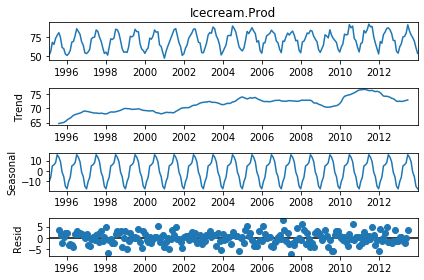

In [9]:
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

decomp = decomp_ts(df['Icecream.Prod'])
print(decomp[:12])
decomp[-12:]

You can see the time series is now decomposed into the three components. 

Note the following about these results:

The periodic component looks reasonable, but may not be stationary as evidenced by the remainder.
The removal of the trend component appears to be a little bit bumpy.

Notice that the first and last 6 values of the trend and seasonal component are missing. We will need to take this into account when performing any analysis.


Plot the ACF and PACF of the residual component for the STL decomposition. 

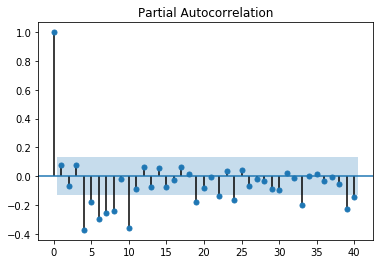

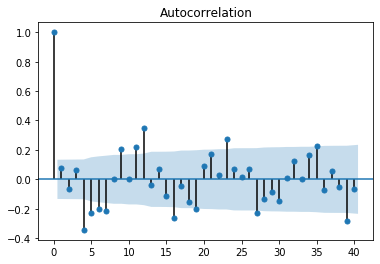

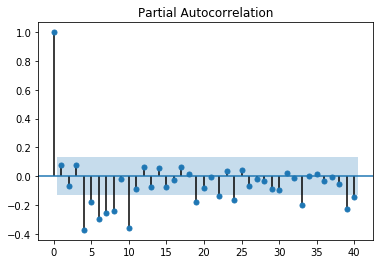

In [10]:
splt.plot_acf(decomp.resid[6:-6], lags = 40)
splt.plot_pacf(decomp.resid[6:-6], lags = 40)

From ACF and PACF, residuals are not stationary because there are a few significant values at some lags. Some signs of periodicity which the STL decomposition has not removed. 

We can use Dicky Fuller test to further determine if the residual is stationary.The null hypothesis is that the time series is not stationary, but with no trend.

In [11]:
from statsmodels.tsa.stattools import adfuller
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
DF_Test(decomp.resid[6:-6])    

D-F statistic = -10.615314403551848
p-value = 5.694807144315272e-19
number of lags used = 9
Critical value at 5% confidence = -2.8756749365852587
Critical value at 10% confidence = -2.5743041549627677


Given the DF statistic and small p-value we can reject the null hypothesis that the residual is not stationary.

### Let's build the model.
First using linear regression to fit the training data, find the residuals. Use residuals to fit ARIMA model. Finally, combine the residual and SARIMA component to make final predictions.

Now that we have explored these data, the next step is to compute and evaluate a forecast model. In this case, we will hold back the last 12 months of data before we train the model. The final 12 months of data can then be used to evaluate the model.

In [12]:
from scipy.stats import zscore
#normalize time features 
df[['Month.Count', 'monthNumSqred']] = df[['Month.Count', 'monthNumSqred']].apply(zscore)
#Create dummy variables for months
dummies = pd.get_dummies(df['Month'])
df[list(dummies.columns)] = dummies

In [13]:
import sklearn.linear_model as lm

#exclude the last 12 months which to be the validation data
X = df.loc[:'2012-12-31', ['Month.Count', 'monthNumSqred', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].values
Y = df.loc[:'2012-12-31', 'Icecream.Prod'].values

#set up linear regression to predict the trends and seasonality
lm_mod = lm.LinearRegression(fit_intercept = False)

# fit the model using months as X and icecream production as Y
mod_fit = lm_mod.fit(X, Y)

# Store the predictions to scores and
# Calculate the residual using prediction - true value, stored as resids
df.loc[:'2012-12-31', 'scores'] = mod_fit.predict(X)
df.loc[:'2012-12-31', 'resids'] = df.loc[:'2012-12-31', 'scores'] - df.loc[:'2012-12-31', 'Icecream.Prod']

Let's have a look at how these predicted trend and seasonal components fit the actual electric production time series. The code in the cell below plots the actual time series in red and the values predicted by the trend and seasonal model in blue.

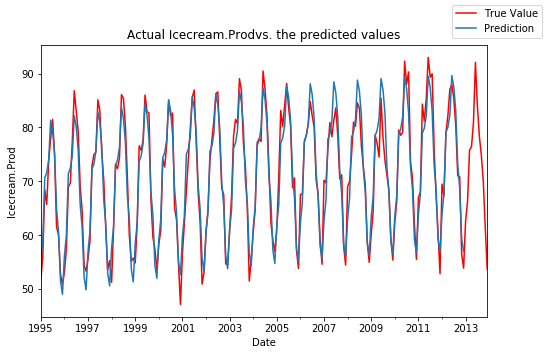

In [14]:
def plot_mod_fit(df, col):
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax, label = 'True Value')
    df.loc[:, 'scores'].plot(ax = ax, label='Prediction') 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
    fig.legend()
    
plot_mod_fit(df, 'Icecream.Prod')   


Using the linear model to train months data, the prediction is not bad for the training data.


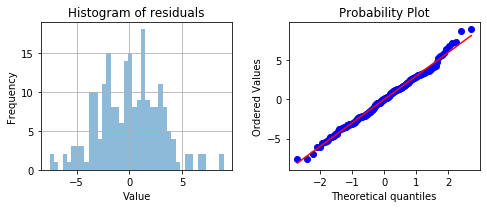

In [15]:
def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    ts.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of ' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax2)
    f.tight_layout()
    
def plot_ts(ts, lab = ''):
    plt.plot(ts)
    plt.title('Time series plot of ' + lab)
    plt.ylabel('Value')
    plt.xlabel('Date')

    
dist_ts(df.loc[:'2012-12-31', 'resids'], lab='residuals')

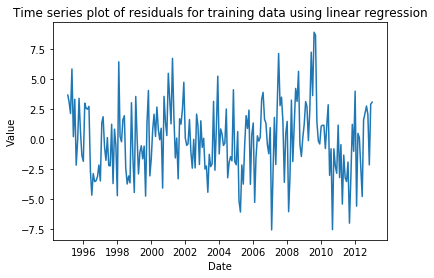

In [16]:
plot_ts(df.loc[:'2012-12-31', 'resids'], lab='residuals for training data using linear regression')

From the histogram, not a nice normal distributed histogram. But in Q-Q plot, data lines quite linearly. So I would say residuals approximately normally distributed. 

The time series plot of the residual shows no periodic behavior.

In [17]:
def ks_test(dat, name, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic for '+ name + ' = ' + str(ks_statisic))
    print('P-value for ' + name + '= ' + str(pvalue))
ks_test(df.loc[:'2012-12-31', 'resids'], 'residuals') 

KS-statistic for residuals = 0.27042661231020304
P-value for residuals= 1.919366175532126e-14


Based on the statitics, p-value is way more smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis that residuals are not normally distributed. It implies that this regression is not a good regression (because for a good regression model, the residuals should follow a normal distribution)

To have a point of comparison, compute the root mean square error (RMSE) of the fit of the model for the last 12 months of the electric production time series.

In [37]:
def RMSE(ts, score):
    from math import sqrt
    rmse = sqrt(np.std(ts - score))
    return ('RMSE: %.2f'%rmse)

## Make the forecast for the next year (only the linear regression)
X2 = df.loc['2013-1-31':, ['Month.Count', 'monthNumSqred', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].values
RMSE(df.loc['2013-1-31':, 'Icecream.Prod'].values, mod_fit.predict(X2))

'RMSE: 1.56'

RMSE is Root Mean Square Error, a standard way to measure the error of a model in predicting quantitative data. Here, the RMSE for linear regression of training data is reported to be 1.56. 

Next, we take a look at the residuals for testing data using linear regression model.

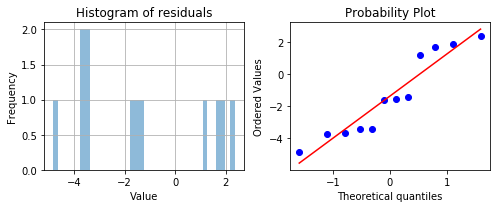

In [38]:
#Check whether the residual forcast from linear regression is normally distributed
resid_lr = (df.loc['2013-1-31':, 'Icecream.Prod']- mod_fit.predict(X2))
dist_ts(resid_lr, lab='residuals')

From histogram, the residuals is not centered at zero. And data points are off in Q-Q plot. Using ks-test to see the normality.

In [39]:
ks_test(resid_lr, 'residual from linear regression')

KS-statistic for residual from linear regression = 0.5862520339822141
P-value for residual from linear regression= 0.0001879024479483175


Based on the statitics, p-value is way more smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis that residuals are not normally distributed. It implies that this regression is not a good regression (because for a good regression model, the residuals should follow a normal distribution)

Next, we want to add ARIMA components into our model.
We compute the ARIMA model using the residual. We will train this model without the last 12 months of data, then evaluate. Using auto_arima to find the optimal model for residual we calculated from linear regression.

In [40]:
stepwise_fit = auto_arima(df.resids[0:-12], start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12, max_P = 3, max_Q = 3,
                             start_P=1, start_Q=1, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=1031.108, BIC=1050.988, Time=0.733 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1160.825, BIC=1167.451, Time=0.016 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1109.077, BIC=1122.330, Time=0.208 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1041.488, BIC=1054.741, Time=0.294 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1158.825, BIC=1162.138, Time=0.015 seconds
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1043.252, BIC=1059.818, Time=0.412 seconds
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=1064.014, BIC=1080.580, Time=0.267 seconds
Fit ARIMA(1,1,1)x(2,1,1,12) [intercept=True]; AIC=1029.584, BIC=1052.776, Time=1.790 seconds
Fit ARIMA(1,1,1)x(2,1,0,12) [intercept=True]; AIC=1056.386, BIC=1076.265, Time=0.782 seconds
Fit ARIMA(1,1,1)x(3,1,1,12) [intercept=True]; AIC=1022.117, BIC=1048.622, Time=2.504 seconds
Fit ARIMA(1,1,1)x(3,1,0,12

In [41]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  216
Model:             SARIMAX(1, 1, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -490.568
Date:                                    Wed, 24 Jun 2020   AIC                           1003.136
Time:                                            23:46:00   BIC                           1039.582
Sample:                                                 0   HQIC                          1017.881
                                                    - 216                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0170      0.049      0.349      0.727      -0.079       0.113
ar.L1         -0.7550      0.120     -6.287      0.000      -0.990      -0.520
ma.L1          0.2002      0.101      1.990      0.047       0.003       0.397
ma.L2         -0.6615      0.059    -11.251      0.000      -0.777      -0.546
ar.S.L12       0.8466      0.255      3.314      0.001       0.346       1.347
ar.S.L24      -0.9858      0.228     -4.327      0.000      -1.432      -0.539
ar.S.L36      -0.0089      0.211     -0.042      0.966      -0.422       0.404
ma.S.L12      -1.4185      0.351     -4.040      0.000      -2.107      -0.730
ma.S.L24       1.4340      0.679      2.112      0.035       0.103       2.765
ma.S.L36      -0.5948      0.379     -1.570      0.117      -1.337       0.148
sigma2         6.1388      2.030      3.024      0.002       2.160      10.118
===================================================================================
Ljung-Box (Q):                       71.60   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.00   Prob(JB):                         0.67
Heteroskedasticity (H):               1.59   Skew:                             0.01
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Seasonal ARIMA, denoted as ARIMA (p, d, q) (P,D,Q)s.(p, d, q) are the non-seasonal parameters described above, while (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

In the summary output, the best model is ((1, 1, 2)x(3, 1, [1, 2, 3], 12), with BIC to be 1039.582.

Setting the alpha to be 0.05, the coefficents of intercept, ar.S.L36, ma.S.L36 are greater than alpha 0.05, implying that these coefficients are not statiscally significant and model is likely overfitting.

Still, the best model is ((1, 1, 2)x(3, 1, [1, 2, 3], 12), which is going to be used in the following training.

In [42]:
import statsmodels.api as sm
#setup the training data
y = df.loc[:'2012-12-31', 'resids']
#setup the best model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 2),
                                seasonal_order=(3, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

#fit the model
resid_model = mod.fit()

In [43]:
resid_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                     resids   No. Observations:                  216
Model:             SARIMAX(1, 1, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -400.274
Date:                                    Wed, 24 Jun 2020   AIC                            820.548
Time:                                            23:46:06   BIC                            851.547
Sample:                                        01-31-1995   HQIC                           833.132
                                             - 12-31-2012                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4976      0.197     -2.531      0.011      -0.883      -0.112
ma.L1          0.0375      0.172      0.218      0.827      -0.300       0.375
ma.L2         -0.5338      0.090     -5.960      0.000      -0.709      -0.358
ar.S.L12       0.4725      0.167      2.827      0.005       0.145       0.800
ar.S.L24      -0.6475      0.130     -4.996      0.000      -0.902      -0.394
ar.S.L36      -0.3241      0.153     -2.125      0.034      -0.623      -0.025
ma.S.L12      -1.0565      0.179     -5.906      0.000      -1.407      -0.706
ma.S.L24       0.9410      0.225      4.188      0.000       0.501       1.381
ma.S.L36      -0.2896      0.161     -1.802      0.072      -0.605       0.025
sigma2         6.8667      0.803      8.550      0.000       5.293       8.441
===================================================================================
Ljung-Box (Q):                       70.13   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.00   Prob(JB):                         0.46
Heteroskedasticity (H):               1.67   Skew:                            -0.01
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From above, we can see that P-value for ma.L1 and ma.s.L 36 is large, implying that they are not statistically significant which can be carefully remove fro mthe model. The rest of the coefficients are statistically significant. 

Further, confidence interval overlaps zero. This behavior indicates that the model is over fit or over parameterized.

STill, we keep this model and perform the following analysis. We have the trained model, we can predict the last 12 months using the testing data.

In [44]:
#use the last 12 months to make prediction 
start_index = len(df.loc[:'2012-12-31', 'resids'])
end_index = start_index + 11
pred_resids = resid_model.get_prediction(start=start_index, end=end_index)
#calculate the predictions mean from ARIMA residuals
pred= pred_resids.predicted_mean
#Combine linear regression prediction and ARIMA prediction
df.loc['2013-1-31':, 'scores'] = mod_fit.predict(X2) + pred
final_pred = df.loc['2013-1-31':, 'scores']
final_pred

2013-01-31    59.227270
2013-02-28    68.969214
2013-03-31    81.160519
2013-04-30    79.356322
2013-05-31    82.566317
2013-06-30    93.684797
2013-07-31    90.990050
2013-08-31    88.371216
2013-09-30    74.022462
2013-10-31    69.047094
2013-11-30    62.847195
2013-12-31    60.554817
Freq: M, Name: scores, dtype: float64

The last 12 months forecast production using linear regression, including the ARIMA component is shown above. We next plot the last 12 months prediction and the acutal values.

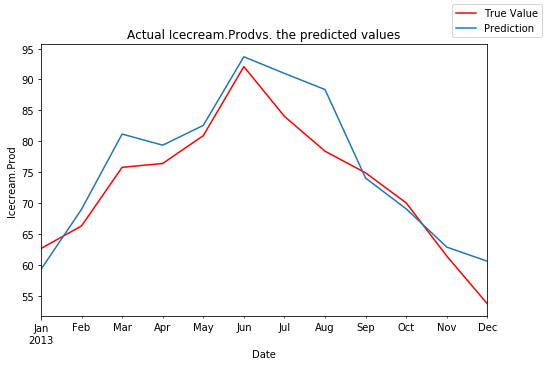

In [45]:
#plot the last 12 months prediction vs true value
plot_mod_fit(df.loc['2013-1-31':], 'Icecream.Prod')   

The forecast for the last 12 months looks reasonable. The red, actual time series, and the prediction, in blue, look very similar for the last 12 months.

Next, let's compute the RMSE and compare these results to the model with only trend and seasonal component. (Previous RMSE (only linear regression) is 1.56)

In [46]:
print( 'RMSE:', RMSE(df.loc['2013-1-31':, 'Icecream.Prod'], df.loc['2013-1-31':, 'scores']))
print('Forecast means: %.2f' %df.loc['2013-1-31':, 'scores'].mean())

RMSE: RMSE: 1.92
Forecast means: 75.90


RMSE is Root Mean Square Error, a standard way to measure the error of a model in predicting quantitative data.
RMSE is relatively small compared to the fprecast mean. But interestingly, the RMSE of prediction using only the linear regression model increased , suggesting that adding the ARIMA model of the residuals for this forecast of the last 12 month doesn't improve the prediction. This is caused by the overfitting of the ARIMA model.



We then study the residuals of the predictions.

In [47]:
# calculate the residuals for the last 12 months 
# These are the residuals for the forecasting using both linear regression
# and ARIMA components
df.loc['2012-12-31':, 'resids'] = (df.loc['2012-12-31':, 'scores'] - 
    df.loc['2012-12-31':, 'Icecream.Prod'])

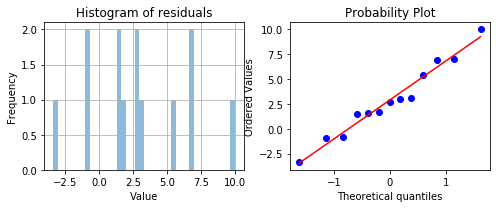

In [48]:
dist_ts(df.loc['2012-12-31':, 'resids'], lab='residuals')

From the histogram of residuals, it is not centered at 0. From the probability plot, some data points are off the line.

In [49]:
ks_test(df.loc['2012-12-31':, 'resids'], 'residuals') 

KS-statistic for residuals = 0.6961459989694887
P-value for residuals= 7.953956590839409e-07


Based on the statitics, p-value is way more smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis that residuals are not normally distributed. It implies that this regression with ARIMA component is not a good model (because for a good regression model, the residuals should follow a normal distribution)

We  then calculate the confidence intervals of the prediction.I use conf_int to get the confidence interval of the ARIMA predictions, then added to the final prediction values. But first, let's look at how confidence interval changes as time moves to the future.

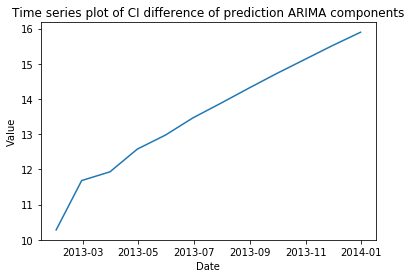

In [50]:
# get the confidence interval for prediction of residuals at alpha = 0.05
pred_ci =pred_resids.conf_int(alpha=0.05)
# calculate the range of confidence intervals
diff_ci = pred_ci['upper resids'] - pred_ci['lower resids'] 
plot_ts(diff_ci, lab='CI difference of prediction ARIMA components')

From the CI difference plot, we can see that the confidence intervals are getting larger as time moves to the future. 

Then we compare confidence intervals to the forecast means. Since we got the confidence interval from ARIMA predictions, we'll compare the ARIMA predictions means to ARIMA confidence interval.

In [51]:
# mean ARIMA prediction
print('ARIMA predictions')
print(pred)
print('\n')
print('Confidence interval of ARIMA predictions')
print(pred_ci)
print('\n')
print ('Mean for forecast means (only ARIMA): %.2f' %pred.mean())
print ('Mean for range of confidence interval (only ARIMA): %.2f' %diff_ci.mean())

ARIMA predictions
2013-01-31   -4.787018
2013-02-28    1.098152
2013-03-31    1.950628
2013-04-30   -0.768732
2013-05-31    0.136268
2013-06-30    3.940751
2013-07-31    3.316841
2013-08-31    5.173234
2013-09-30    0.851817
2013-10-31    0.248064
2013-11-30    3.326003
2013-12-31    3.508018
Freq: M, dtype: float64


Confidence interval of ARIMA predictions
            lower resids  upper resids
2013-01-31     -9.927071      0.353034
2013-02-28     -4.743051      6.939354
2013-03-31     -4.014089      7.915345
2013-04-30     -7.055885      5.518422
2013-05-31     -6.351155      6.623690
2013-06-30     -2.789788     10.671290
2013-07-31     -3.624213     10.257896
2013-08-31     -1.983660     12.330128
2013-09-30     -6.508959      8.212593
2013-10-31     -7.313870      7.809998
2013-11-30     -4.430414     11.082419
2013-12-31     -4.439000     11.455035


Mean for forecast means (only ARIMA): 1.50
Mean for range of confidence interval (only ARIMA): 13.53


Some ARIMA predictions are negative, meaning that some season/time have negative impact on icecream production.

Confidence interval (mean) is relatively large compared to the forecasted mean, suggesting that icecream production predictions have large intervals.

In [52]:
#create the upper and lower line for final predictions.
upper = pred_ci['upper resids'] + df.loc['2013-1-31':, 'scores']
lower =df.loc['2013-1-31':, 'scores'] + pred_ci['lower resids']

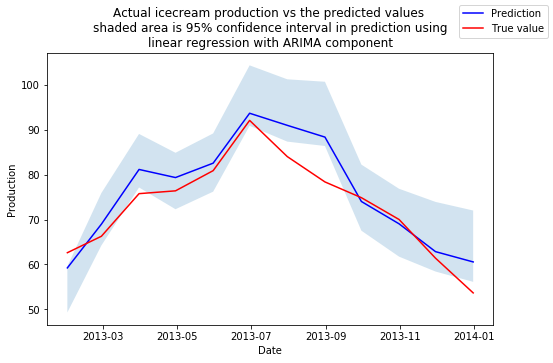

In [53]:
fig = plt.figure(figsize=(8, 5)) # set plot area
ax = fig.gca() # define axis  
plt.plot(df.loc['2013-1-31':, 'scores'],color = 'b', label = 'Prediction')
plt.plot(df.loc['2013-1-31':, 'Icecream.Prod'], color ='r', label='True value')
ax.fill_between(lower.index, upper, lower, alpha=0.2)
ax.set_title('Actual icecream production vs the predicted values \n' +
            'shaded area is 95% confidence interval in prediction using\n' +
            'linear regression with ARIMA component') # Give the plot a main title
ax.set_xlabel('Date') # Set text for the x axis
ax.set_ylabel('Production')# Set t"ext for y axis
fig.legend();

In this prediction plot, we can see that using linear regression + ARIMA components can make a pretty good prediction. The shaded area is the confidence interval calculated from the ARIMA preidcitons. Areas get larger as time to to the future. We can see most of the true values fall into the confidence interval, indicating that the prediction is quite good. However, we also notice that the ARIMA model overfits somehow, more parameters are needed to be trained for improvement. 